In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data 

In [2]:
df = pd.read_excel('pima-data.xlsx')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes_orig,skin,has_diabetes,diabetes
0,6,148,72,35,0,33.6,0.627,50,1,1.3790,True,True
1,1,85,66,29,0,26.6,0.351,31,0,1.1426,False,False
2,8,183,64,0,0,23.3,0.672,32,1,0.0000,True,True
3,1,89,66,23,94,28.1,0.167,21,0,0.9062,False,False
4,0,137,40,35,168,43.1,2.288,33,1,1.3790,True,True


## Cleaning the data

#### Step1: Check whether is it having null values or not

In [3]:
df.isnull().values.any()

False

In [4]:
df.isna().values.any()

False

#### Step 2: Check any coulmn is duplicated or not

([<matplotlib.axis.YTick at 0x1f5d5509670>,
 [Text(0, 0, 'num_preg'),
  Text(0, 1, 'glucose_conc'),
  Text(0, 2, 'diastolic_bp'),
  Text(0, 3, 'thickness'),
  Text(0, 4, 'insulin'),
  Text(0, 5, 'bmi'),
  Text(0, 6, 'diab_pred'),
  Text(0, 7, 'age'),
  Text(0, 8, 'diabetes_orig'),
  Text(0, 9, 'skin'),
  Text(0, 10, 'has_diabetes'),
  Text(0, 11, 'diabetes')])

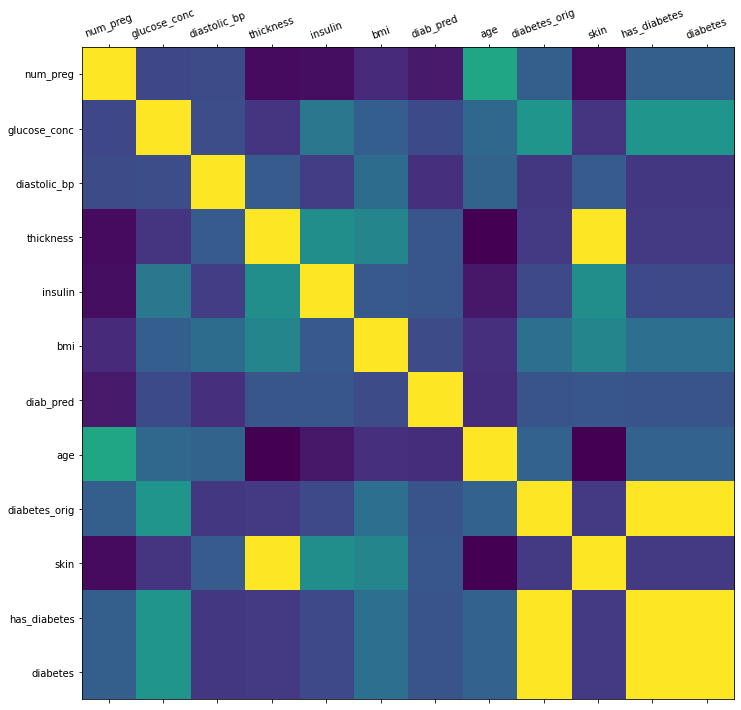

In [5]:
corr = df.corr()

fig,ax = plt.subplots(figsize=(24,12))

ax.matshow(corr)
plt.xticks(range(len(corr.columns)),corr.columns,rotation=20)
plt.yticks(range(len(corr.columns)),corr.columns)

In [6]:
import seaborn as sns

<AxesSubplot:>

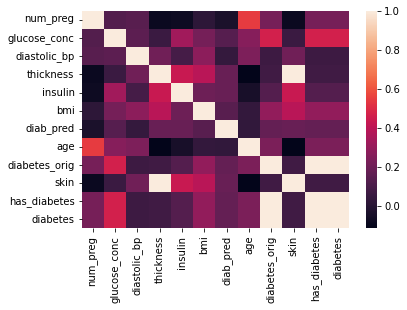

In [7]:
sns.heatmap(df.corr())

#### Deleteing correlated columns

In [8]:
del df['thickness']
del df['diabetes_orig']
del df['has_diabetes']

# df.drop('thickness',axis=1,inplace=True)

In [9]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,True
1,1,85,66,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,23.3,0.672,32,0.0000,True
3,1,89,66,94,28.1,0.167,21,0.9062,False
4,0,137,40,168,43.1,2.288,33,1.3790,True


In [10]:
df['diabetes'].unique()

array([ True, False])

#### Replacing True with 1 and False with 0

In [11]:
dict_replace = {
    'diabetes':{
        True:1,
        False:0
    }
}
df.replace(dict_replace,inplace=True)

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,0,33.6,0.627,50,1.3790,1
1,1,85,66,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,23.3,0.672,32,0.0000,1
3,1,89,66,94,28.1,0.167,21,0.9062,0
4,0,137,40,168,43.1,2.288,33,1.3790,1


In [13]:
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])
print(f'NUmber of diabetic Patient {num_true}')
print(f'Number of Non diabetic patient {num_false}')

per_true = (num_true/(num_true+num_false))*100
print(per_true)

per_false = (num_false/ (num_true+num_false))*100
print(per_false)

NUmber of diabetic Patient 268
Number of Non diabetic patient 500
34.89583333333333
65.10416666666666


### Splitting data for training and testing

In [14]:
from sklearn.model_selection import train_test_split

input_coulmns = ["num_preg","glucose_conc","diastolic_bp","insulin","bmi","diab_pred","age","skin"]
output_coumns = ["diabetes"]

x = df[input_coulmns].values
y = df[output_coumns].values

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [15]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter
# count = Counter(y_train.ravel())
# print(count)

# smt = SMOTE()
# x_train_sm , y_train_sm = smt.fit_resample(x_train,y_train)

# count1 = Counter(y_train_sm.ravel())
# print(count1)

In [16]:
len_num_preg =len(df.loc[df['num_preg'] == 0])
print(f'Num_preg columns zero count is {len_num_preg}')

len_glucose_conc = len(df.loc[df['glucose_conc'] == 0])
print(f"glucose_conc column zero count is {len_glucose_conc}")

len_diastolic_bp = len(df.loc[df['diastolic_bp'] == 0])
print(f"diastolic_bpcolumn zero count is {len_diastolic_bp}")

len_insulin = len(df.loc[df['insulin'] == 0])
print(f"insulin column zero count is {len_insulin}")

len_bmi = len(df.loc[df['bmi'] == 0])
print(f"bmi column zero count is {len_bmi}")

len_diab_pred= len(df.loc[df['diab_pred'] == 0])
print(f"diab_pred column zero count is {len_diab_pred}")

len_age= len(df.loc[df['age'] == 0])
print(f"age column zero count is {len_age}")

len_skin= len(df.loc[df['skin'] == 0])
print(f"skin column zero count is {len_skin}")

Num_preg columns zero count is 111
glucose_conc column zero count is 5
diastolic_bpcolumn zero count is 35
insulin column zero count is 374
bmi column zero count is 11
diab_pred column zero count is 0
age column zero count is 0
skin column zero count is 227


In [17]:
from sklearn.impute import SimpleImputer

In [18]:
fill_zeros = SimpleImputer(missing_values=0,strategy='mean')
x_train = fill_zeros.fit_transform(x_train)
x_test = fill_zeros.fit_transform(x_test)

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [20]:
nbmodel = GaussianNB()
nbmodel.fit(x_train,y_train.ravel())

predict_output = nbmodel.predict(x_train)

accu = metrics.accuracy_score(y_train,predict_output)
print(accu)

0.7541899441340782


In [21]:
predict_out = nbmodel.predict(x_test)
accu = metrics.accuracy_score(y_test,predict_out)
print(accu)

0.7359307359307359


In [22]:
print(metrics.confusion_matrix(y_test,predict_out))

[[118  33]
 [ 28  52]]


In [23]:
print(metrics.classification_report(y_test,predict_out))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



### random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

### Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

### KNN -- K nearest Neighbour

In [27]:
from sklearn.neighbors import KNeighborsClassifier

### SVM --- Support Vector model

In [28]:
from sklearn.svm import SVC